In [10]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Tk().withdraw()  # We don't want a full GUI, so keep the root window from appearing
file_path = askopenfilename()  # Show an "Open" dialog box and return the path to the selected file

df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False, dtype={0: str})

2024-08-21 11:19:57.720 Python[59841:3241576] +[CATransaction synchronize] called within transaction
2024-08-21 11:19:57.756 Python[59841:3241576] +[CATransaction synchronize] called within transaction
2024-08-21 11:19:57.812 Python[59841:3241576] +[CATransaction synchronize] called within transaction
2024-08-21 11:20:02.478 Python[59841:3241576] +[CATransaction synchronize] called within transaction


In [11]:
print(df.head())

  PROVNUM                  PROVNAME          CITY STATE COUNTY_NAME  \
0  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
1  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
2  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
3  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
4  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   

   COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  ...  Hrs_LPN_ctr  \
0           59  2024Q1  20240101         50        8.0  ...          0.0   
1           59  2024Q1  20240102         49        8.0  ...          0.0   
2           59  2024Q1  20240103         49        8.0  ...          0.0   
3           59  2024Q1  20240104         50        8.0  ...          0.0   
4           59  2024Q1  20240105         51        8.0  ...          0.0   

   Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr  \
0   156.34       156.34          0.

In [12]:
# Basic info about the dataset
df.info()

# Summary statistics
df.describe()

# Checking for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [14]:
# Dropping rows with any missing values
df_cleaned = df.dropna()

# Forward fill missing values
df_filled = df.ffill()

# Backward fill missing values (if you prefer this method)
df_filled_back = df.bfill()


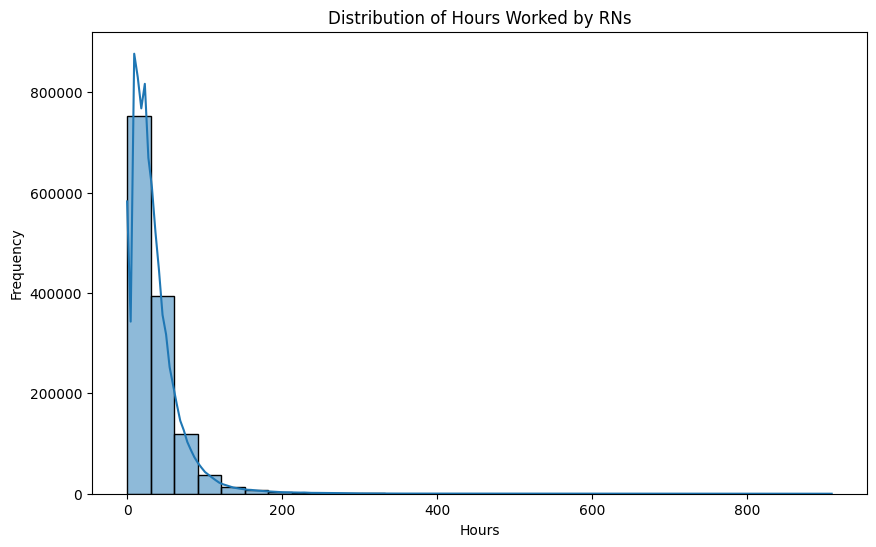

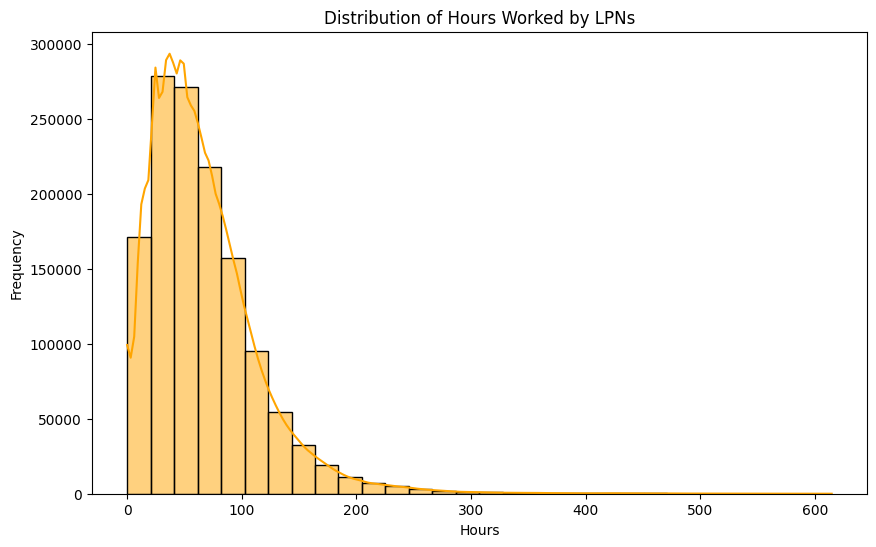

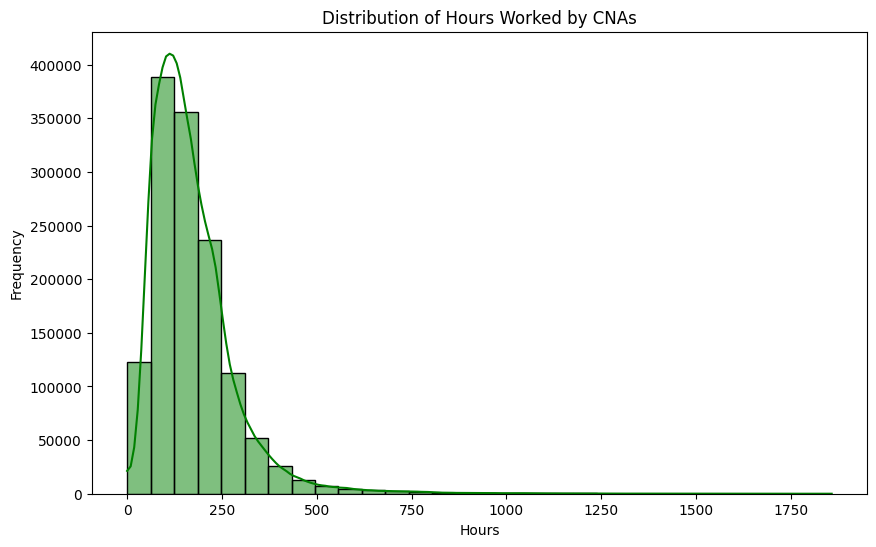

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of hours worked by RNs
plt.figure(figsize=(10, 6))
sns.histplot(df['Hrs_RN'], kde=True, bins=30)
plt.title('Distribution of Hours Worked by RNs')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

# Repeat for other staff types
plt.figure(figsize=(10, 6))
sns.histplot(df['Hrs_LPN'], kde=True, bins=30, color='orange')
plt.title('Distribution of Hours Worked by LPNs')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Hrs_CNA'], kde=True, bins=30, color='green')
plt.title('Distribution of Hours Worked by CNAs')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()


/var/folders/4q/r2bdgcqj3gv1mkrqn9v8gp0c0000gq/T/ipykernel_59841/1727477474.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='WorkDate', y='Hrs_RN', data=df, ci=None)


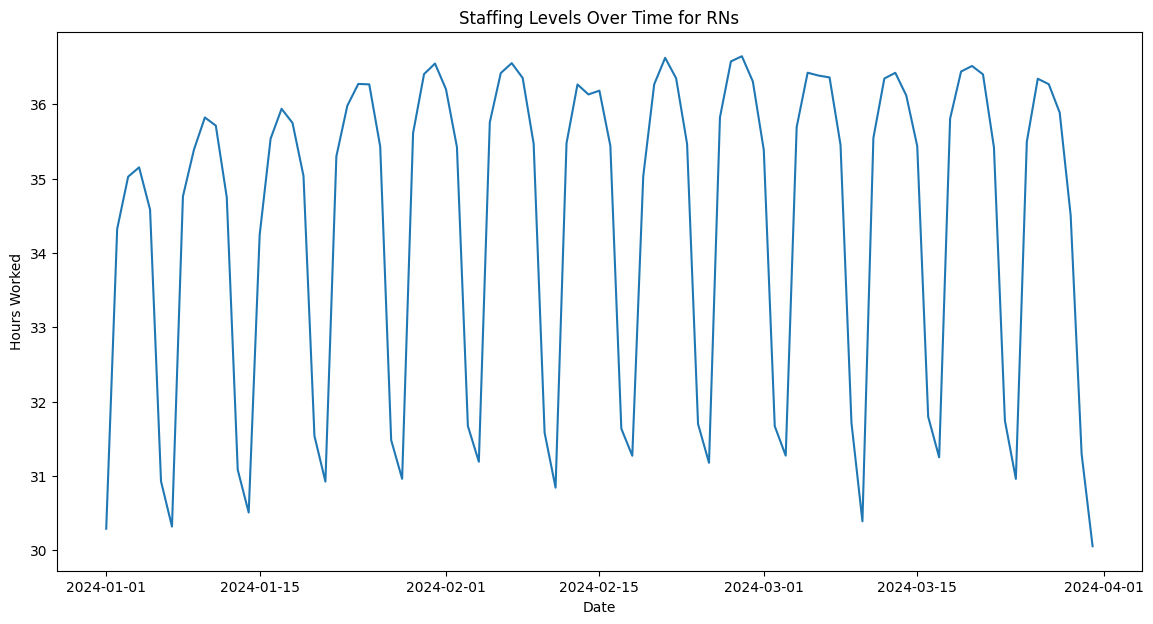

/var/folders/4q/r2bdgcqj3gv1mkrqn9v8gp0c0000gq/T/ipykernel_59841/1727477474.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='WorkDate', y='Hrs_LPN', data=df, ci=None, color='orange')


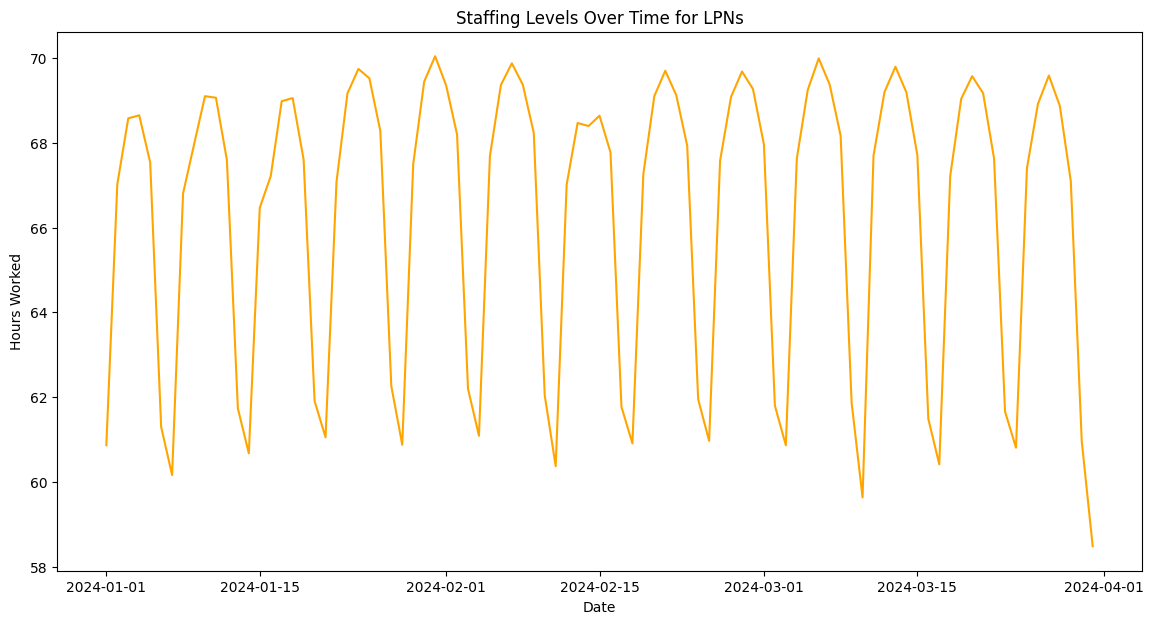

/var/folders/4q/r2bdgcqj3gv1mkrqn9v8gp0c0000gq/T/ipykernel_59841/1727477474.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='WorkDate', y='Hrs_CNA', data=df, ci=None, color='green')


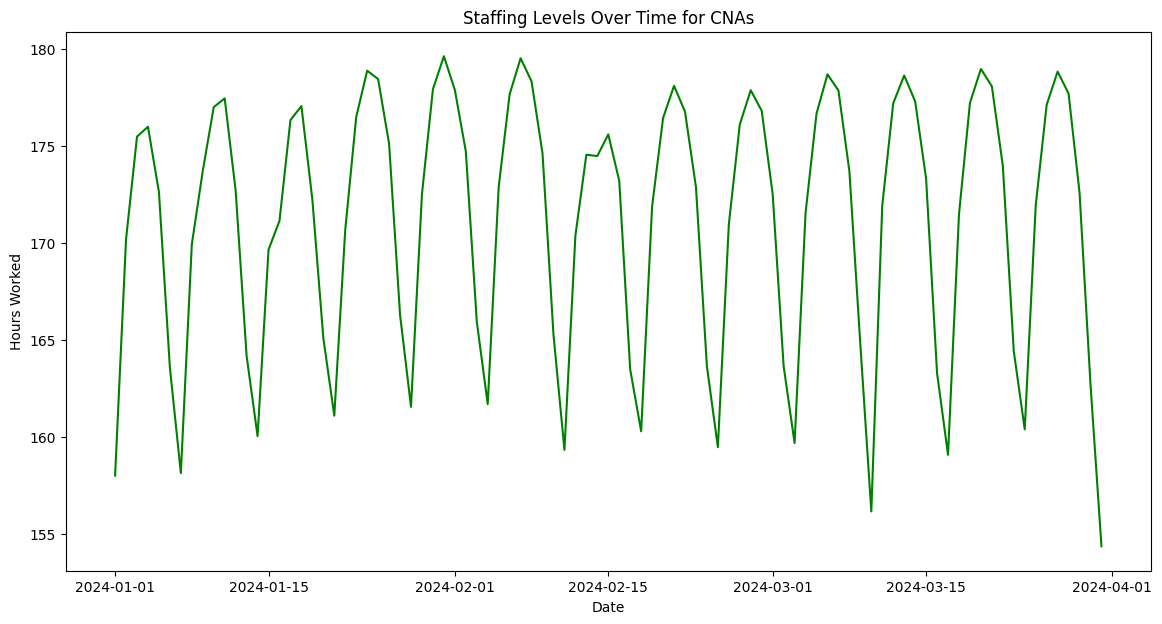

In [17]:
# Convert WorkDate to datetime if not already
df['WorkDate'] = pd.to_datetime(df['WorkDate'], format='%Y%m%d')

# Plot staffing levels over time for RNs
plt.figure(figsize=(14, 7))
sns.lineplot(x='WorkDate', y='Hrs_RN', data=df, ci=None)
plt.title('Staffing Levels Over Time for RNs')
plt.xlabel('Date')
plt.ylabel('Hours Worked')
plt.show()

# Repeat for other staff types
plt.figure(figsize=(14, 7))
sns.lineplot(x='WorkDate', y='Hrs_LPN', data=df, ci=None, color='orange')
plt.title('Staffing Levels Over Time for LPNs')
plt.xlabel('Date')
plt.ylabel('Hours Worked')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='WorkDate', y='Hrs_CNA', data=df, ci=None, color='green')
plt.title('Staffing Levels Over Time for CNAs')
plt.xlabel('Date')
plt.ylabel('Hours Worked')
plt.show()

/var/folders/4q/r2bdgcqj3gv1mkrqn9v8gp0c0000gq/T/ipykernel_59841/2906544271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hrs_RN', y='STATE', data=df_state_avg, palette='viridis')


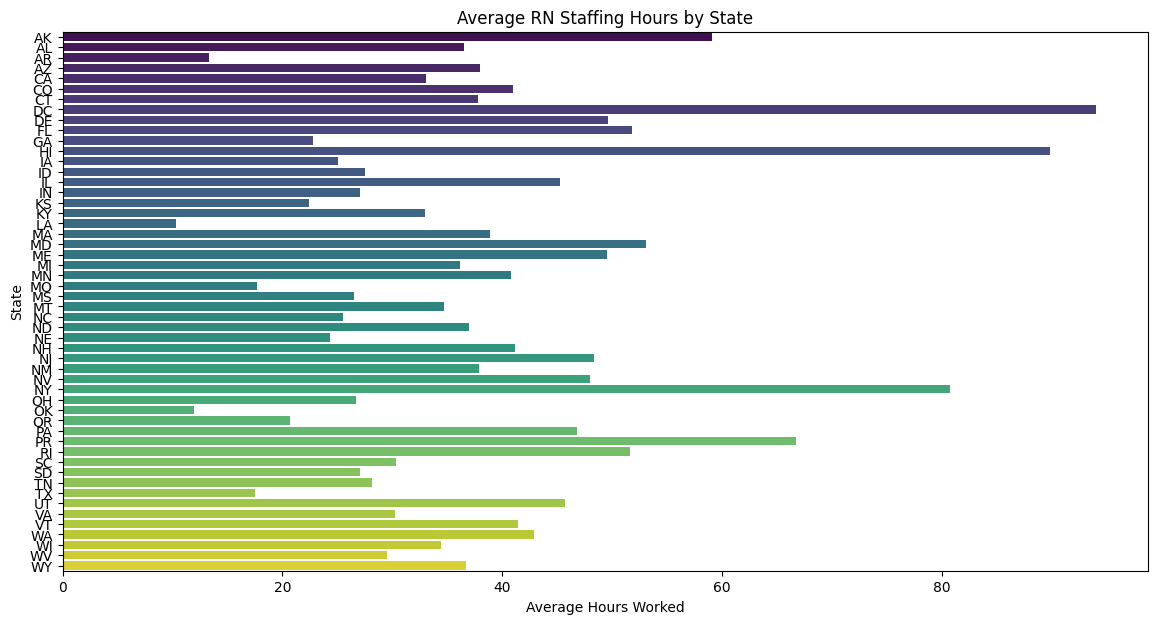

/var/folders/4q/r2bdgcqj3gv1mkrqn9v8gp0c0000gq/T/ipykernel_59841/2906544271.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hrs_LPN', y='STATE', data=df_state_avg, palette='magma')


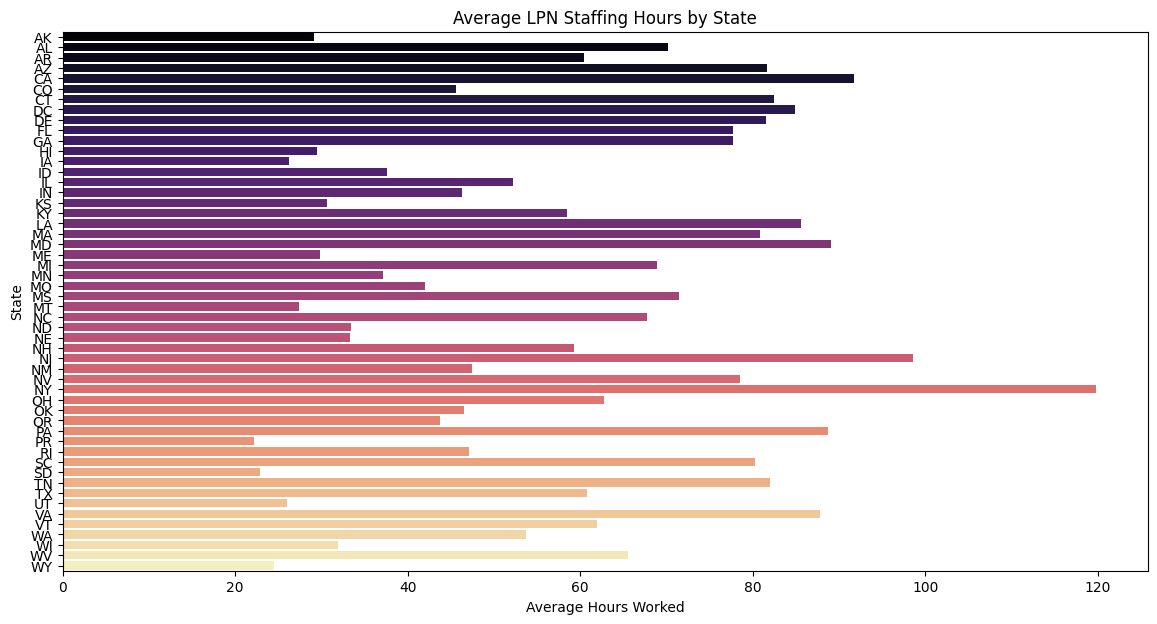

/var/folders/4q/r2bdgcqj3gv1mkrqn9v8gp0c0000gq/T/ipykernel_59841/2906544271.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hrs_CNA', y='STATE', data=df_state_avg, palette='plasma')


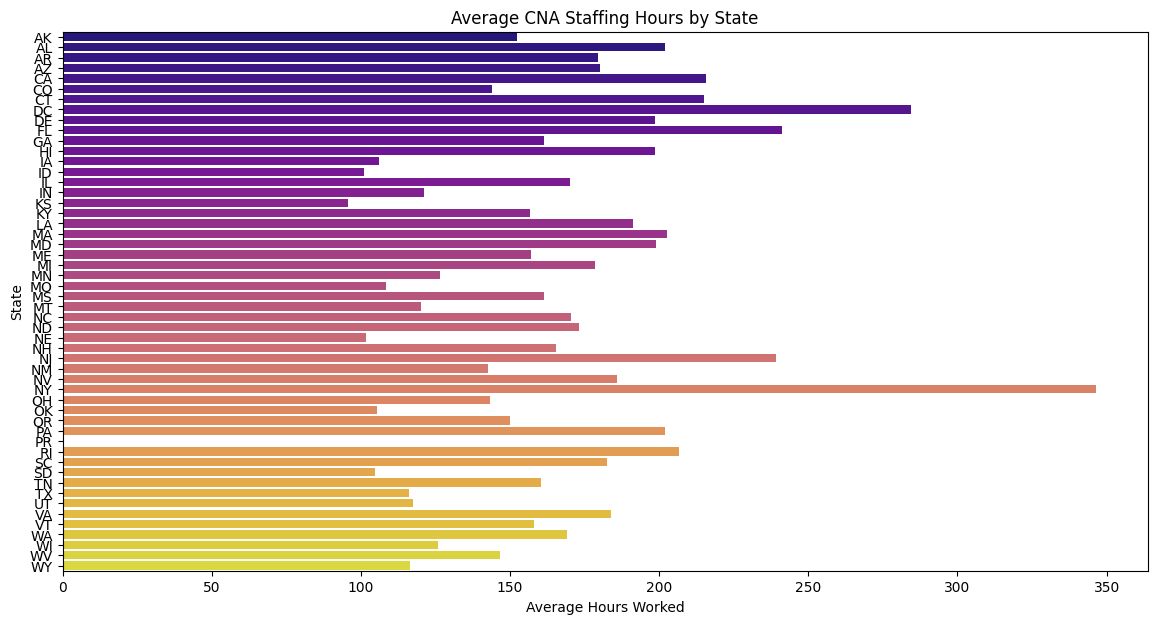

In [18]:
# Plot average staffing hours by state for RNs
plt.figure(figsize=(14, 7))
df_state_avg = df.groupby('STATE')['Hrs_RN'].mean().reset_index()
sns.barplot(x='Hrs_RN', y='STATE', data=df_state_avg, palette='viridis')
plt.title('Average RN Staffing Hours by State')
plt.xlabel('Average Hours Worked')
plt.ylabel('State')
plt.show()

# Repeat for other staff types
plt.figure(figsize=(14, 7))
df_state_avg = df.groupby('STATE')['Hrs_LPN'].mean().reset_index()
sns.barplot(x='Hrs_LPN', y='STATE', data=df_state_avg, palette='magma')
plt.title('Average LPN Staffing Hours by State')
plt.xlabel('Average Hours Worked')
plt.ylabel('State')
plt.show()

plt.figure(figsize=(14, 7))
df_state_avg = df.groupby('STATE')['Hrs_CNA'].mean().reset_index()
sns.barplot(x='Hrs_CNA', y='STATE', data=df_state_avg, palette='plasma')
plt.title('Average CNA Staffing Hours by State')
plt.xlabel('Average Hours Worked')
plt.ylabel('State')
plt.show()


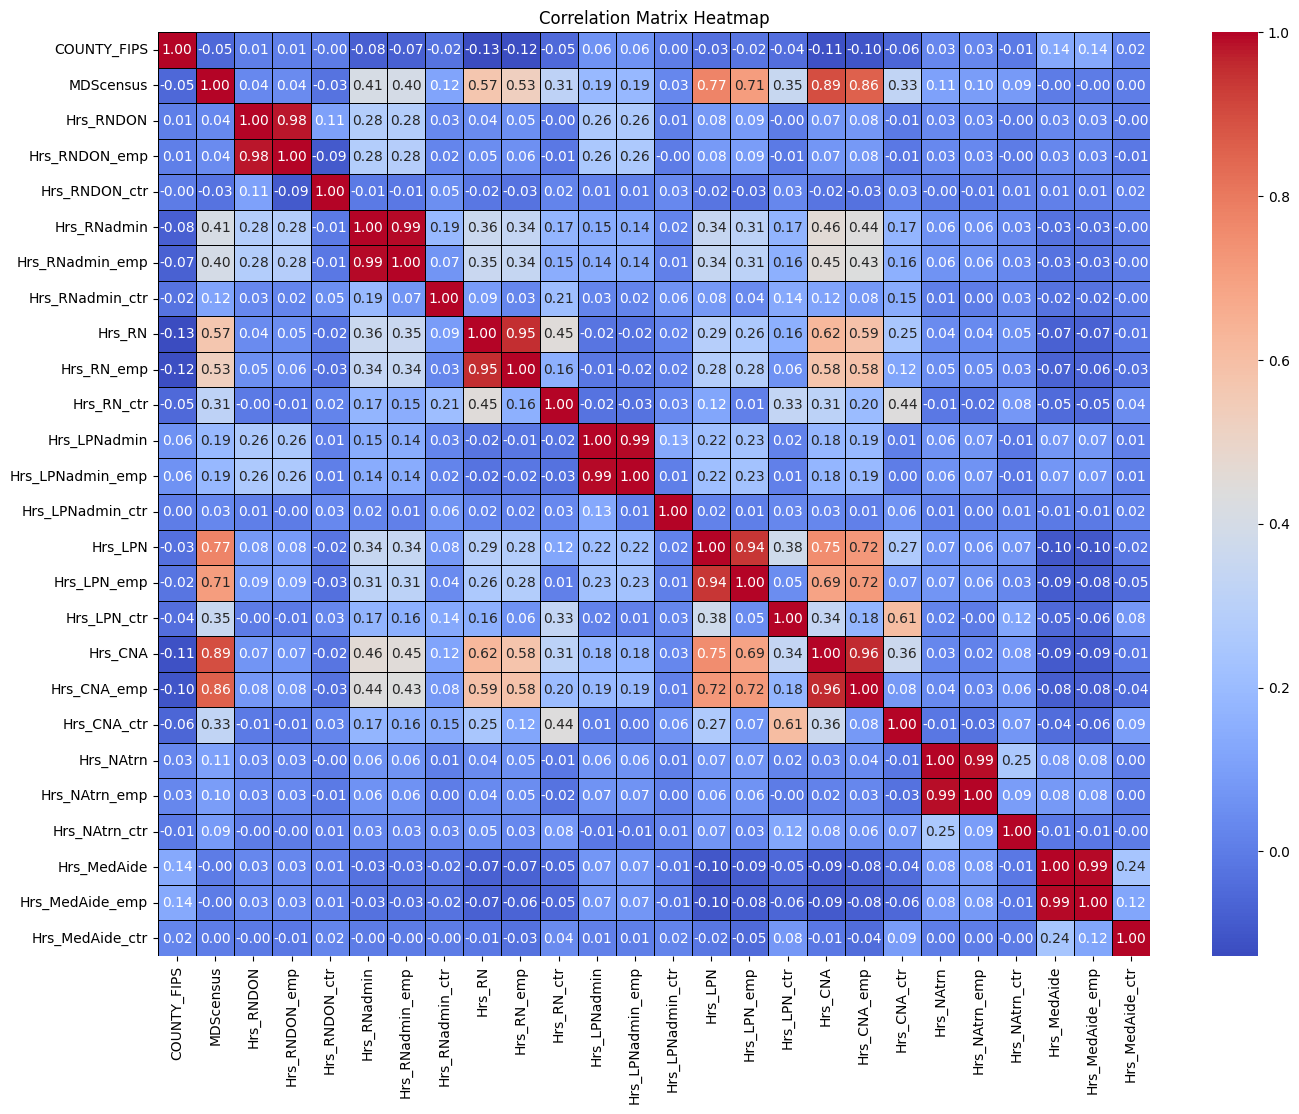

In [20]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()


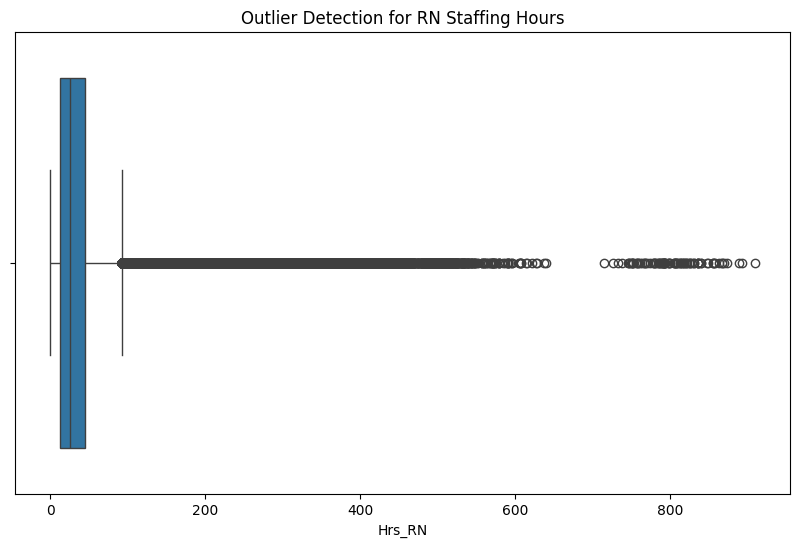

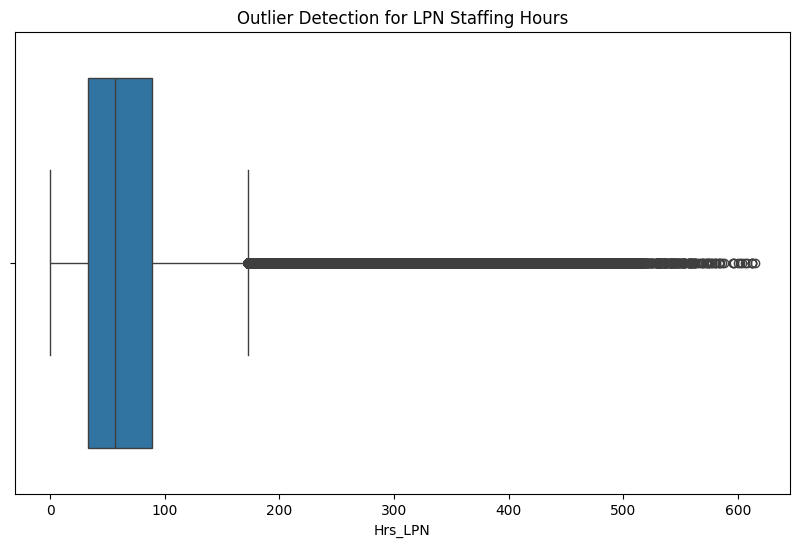

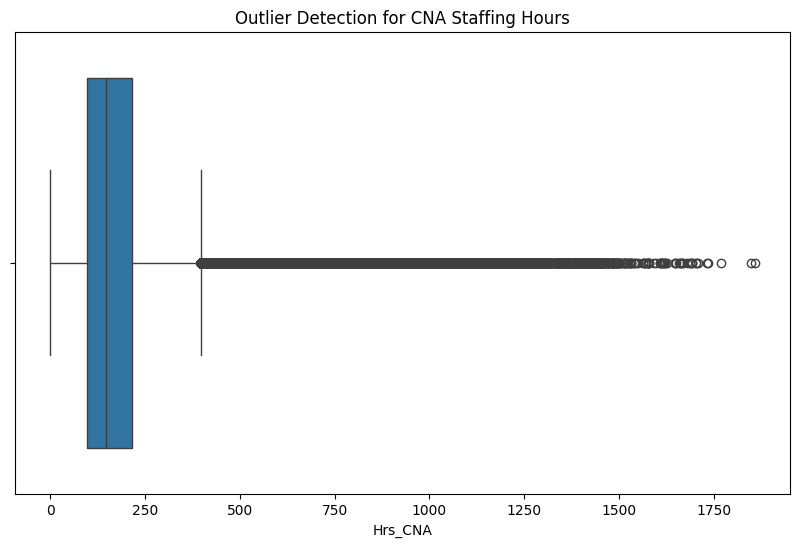

In [21]:
# Plot boxplots to detect outliers for RNs, LPNs, and CNAs
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hrs_RN', data=df)
plt.title('Outlier Detection for RN Staffing Hours')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Hrs_LPN', data=df)
plt.title('Outlier Detection for LPN Staffing Hours')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Hrs_CNA', data=df)
plt.title('Outlier Detection for CNA Staffing Hours')
plt.show()


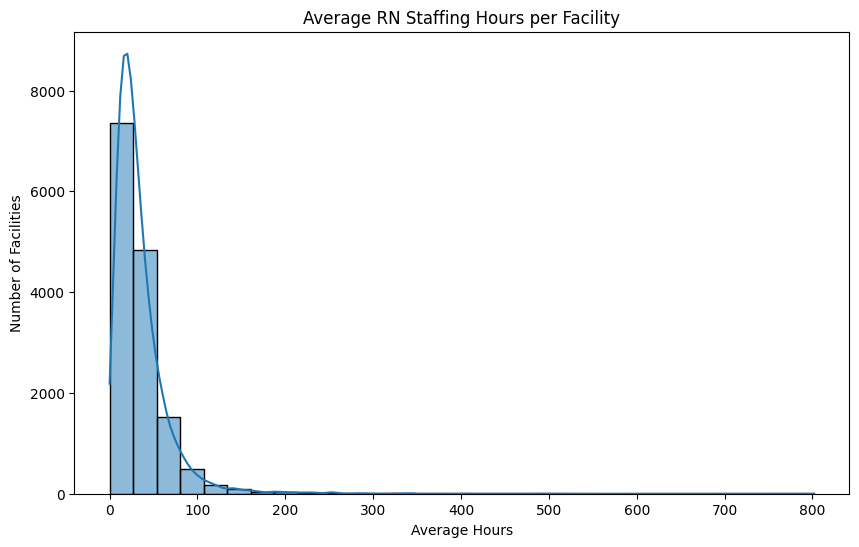

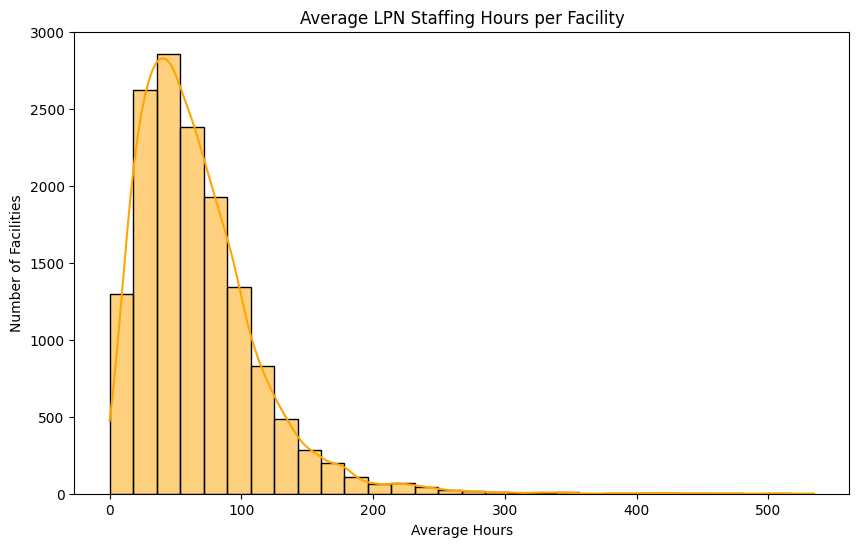

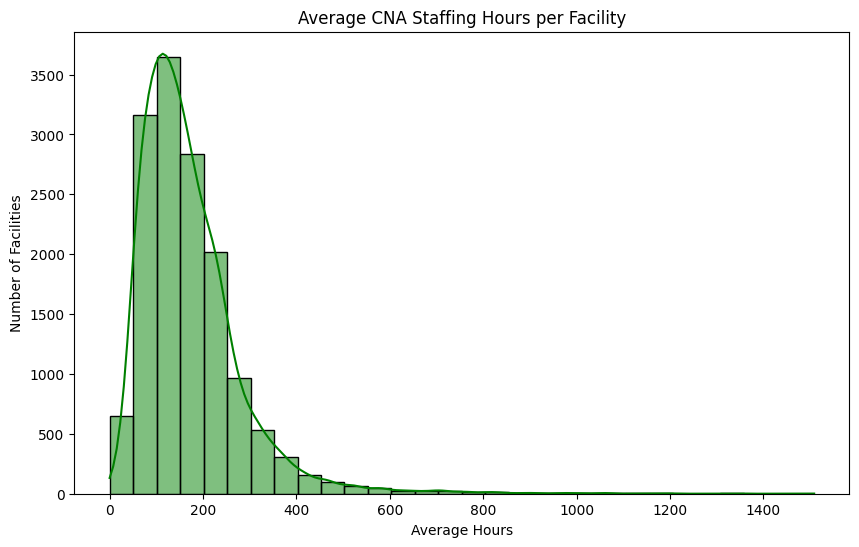

In [22]:
# Check for any facilities with consistently low or high staffing hours
df_grouped = df.groupby('PROVNUM')[['Hrs_RN', 'Hrs_LPN', 'Hrs_CNA']].mean().reset_index()

# Plot histograms to visualize distribution of average hours per facility
plt.figure(figsize=(10, 6))
sns.histplot(df_grouped['Hrs_RN'], kde=True, bins=30)
plt.title('Average RN Staffing Hours per Facility')
plt.xlabel('Average Hours')
plt.ylabel('Number of Facilities')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_grouped['Hrs_LPN'], kde=True, bins=30, color='orange')
plt.title('Average LPN Staffing Hours per Facility')
plt.xlabel('Average Hours')
plt.ylabel('Number of Facilities')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_grouped['Hrs_CNA'], kde=True, bins=30, color='green')
plt.title('Average CNA Staffing Hours per Facility')
plt.xlabel('Average Hours')
plt.ylabel('Number of Facilities')
plt.show()
